In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore') # To suppress all the warnings in the notebook.
import numpy as np


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.


In [4]:
facebook_df = pd.read_csv("facebook_data.csv")
facebook_df

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756


In [5]:
facebook_df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [6]:
facebook_df.info()

# shows that there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

In [12]:
facebook_df.dtypes

userid                     int64
age                        int64
dob_day                    int64
dob_year                   int64
dob_month                  int64
gender                    object
tenure                   float64
friend_count               int64
friendships_initiated      int64
likes                      int64
likes_received             int64
mobile_likes               int64
mobile_likes_received      int64
www_likes                  int64
www_likes_received         int64
dtype: object

In [7]:
facebook_df.columns


Index(['userid', 'age', 'dob_day', 'dob_year', 'dob_month', 'gender', 'tenure',
       'friend_count', 'friendships_initiated', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received'],
      dtype='object')

In [8]:
facebook_df.drop(['userid'],inplace=True,axis=1)

# userid column has been dropped as it was not required for analysis

In [43]:
facebook_df.tail(10)

,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
98993,19,15,1994,8,male,394.0,4538,4144,4501,15088,4435,5961,66,9127,10-20
98994,20,4,1993,1,female,402.0,1988,332,7351,106025,7248,73333,103,32692,10-20
98995,20,9,1993,10,female,699.0,3611,973,4507,7768,4414,6909,93,859,10-20
98996,24,25,1989,4,female,182.0,2938,1272,6018,17765,5843,11708,175,6057,21-30
98997,28,14,1985,12,female,290.0,2218,1618,4626,10268,4290,4250,336,6018,21-30
98998,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202,61-70
98999,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820,10-20
99000,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092,10-20
99001,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756,21-30
99002,39,15,1974,5,female,397.0,2049,768,9410,12443,9410,9530,0,2913,31-40


In [9]:
facebook_df.describe()
                                                                    

,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


In [16]:
# install pandas profiling
!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in c:\users\ss186188\appdata\local\continuum\anaconda3\lib\site-packages (2.8.0)


In [17]:
pip install -I joblib==0.14.1

  Using cached joblib-0.14.1-py2.py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [18]:
!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in c:\users\ss186188\appdata\local\continuum\anaconda3\lib\site-packages (2.8.0)


In [2]:
pip install --upgrade pip

  Found existing installation: pip 19.1.1
    Uninstalling pip-19.1.1:
      Successfully uninstalled pip-19.1.1
Note: you may need to restart the kernel to use updated packages.


In [80]:
!pip install pandas-profiling==2.2.0 --user

Processing c:\users\ss186188\appdata\local\pip\cache\wheels\75\3b\90\0c53c3394db73364763995c1ad2426ee2bcc738c2ddb39ec15\pandas_profiling-2.2.0-py2.py3-none-any.whl


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [12]:
#from pandas_profiling import profile_report

In [10]:
# Pandas Profiling before Data Preprocessing
#import pandas.util.testing as tm

import pandas_profiling as pp


In [26]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html
###'''profile = facebook_df.profile_report(title='Facebook Pandas Profiling before Data Preprocessing')profile.to_file(output_file="profiling_before_preprocessing.html")profile'''


#reports= pandas_profiling.profile_report(facebook_df)

#reports.to_file("facebookdata.html")

report= pp.ProfileReport(facebook_df)
report.to_file('facebook.html')


In [11]:
# number of male  and female using facebook

facebook_df['gender'].value_counts()

male      58574
female    40254
Name: gender, dtype: int64

In [12]:
facebook_df['gender'].value_counts(dropna=False)



male      58574
female    40254
NaN         175
Name: gender, dtype: int64

In [13]:
facebook_df.groupby('gender').friend_count.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,40254.0,241.969941,476.039706,0.0,37.0,96.0,244.0,4923.0
male,58574.0,165.035459,308.466702,0.0,27.0,74.0,182.0,4917.0


In [14]:
# Divide the age into groups

labels=['10-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120']
facebook_df['age_group'] = pd.cut(facebook_df.age,bins=np.arange(10,121,10),labels=labels,right=True)
facebook_df.head()

,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
0,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,10-20
1,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,10-20
2,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,10-20
3,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,10-20
4,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,10-20


In [15]:
# Count the users as the age group
facebook_df.age_group.value_counts()

21-30      28646
10-20      24752
31-40      12491
51-60       9319
41-50       8968
61-70       6855
101-110     3449
71-80       2249
91-100      1219
81-90        817
111-120      238
Name: age_group, dtype: int64

<AxesSubplot:xlabel='age_group', ylabel='friend_count'>

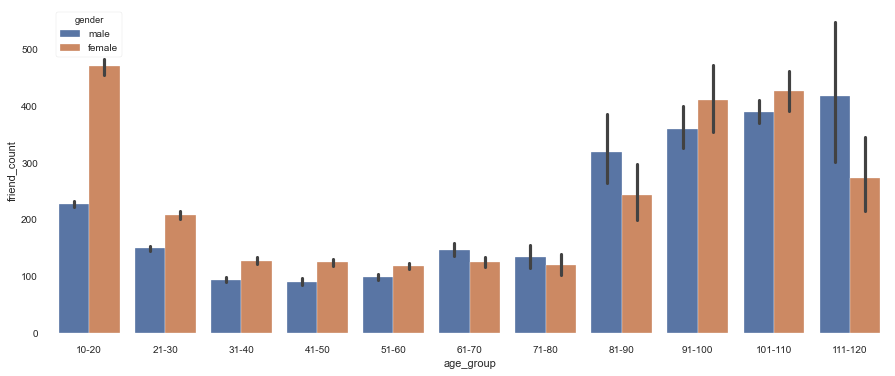

In [16]:
# Friend counts between male  and females
plt.figure(figsize = (15, 6))
sns.barplot(x=facebook_df['age_group'],y=facebook_df['friend_count'],hue=facebook_df.gender)

In [17]:
# Count the number of people who are having "No friends"
friendcount=facebook_df.friend_count==0
friendcount.value_counts()

# here 97041 people are there who are having few or more facebook friends
#  and 1962 people are there which have their account in facebook but no friends

False    97041
True      1962
Name: friend_count, dtype: int64

tenure             
                  sum         mean
age_group                         
10-20       9178734.0   370.827973
21-30      12017080.0   419.502897
31-40       5686717.0   455.265151
41-50       5081277.0   566.600914
51-60       6800355.0   729.730121
61-70       6079966.0   886.938877
71-80       2148937.0   955.507781
81-90        879123.0  1077.356618
91-100      1328346.0  1089.701395
101-110     3675222.0  1065.899652

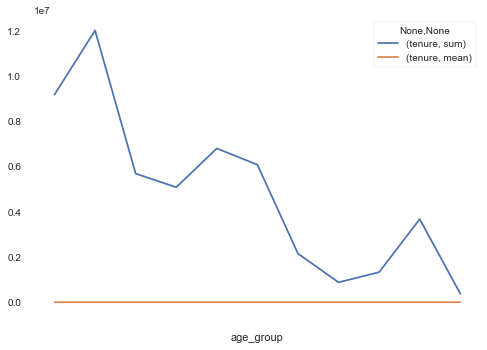

In [18]:
# Analysis of Tenure by age group.

fb_tenure=facebook_df.groupby(['age_group'], axis=0).agg({'tenure':[np.sum,np.mean]})
fb_tenure.plot()
fb_tenure.head(10)

# mean of 101-110 is very high compared  to young age users. Intersting!!

<AxesSubplot:title={'center':'tenure'}, xlabel='gender'>

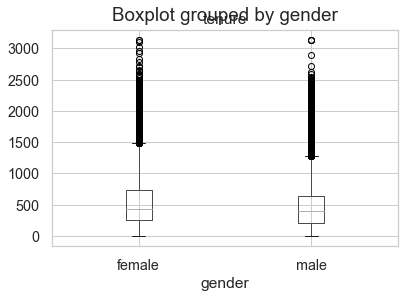

In [90]:
# Analysis the tenure gender wise
facebook_df.boxplot(by ="gender", column="tenure")

# it shows meantime spent by females is more that male


<AxesSubplot:xlabel='gender', ylabel='friend_count'>

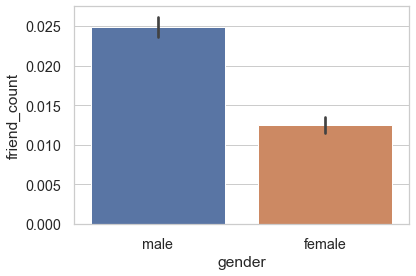

In [54]:
#plotting the gender vs zero friend count 
#friendcount=facebook_df.friend_count==0

sns.barplot(y=facebook_df.friend_count==0,x=facebook_df.gender)

In [66]:
# Friend count as per gender
fb_count=facebook_df.groupby(['gender'], axis=0).agg({'friend_count':[np.size,np.sum,np.mean]})
fb_count

# female users are less compared to male but still they have more friend count. interesting!!

friend_count                     
               size      sum        mean
gender                                  
female        40254  9740258  241.969941
male          58574  9666787  165.035459

<AxesSubplot:xlabel='gender', ylabel='friend_count'>

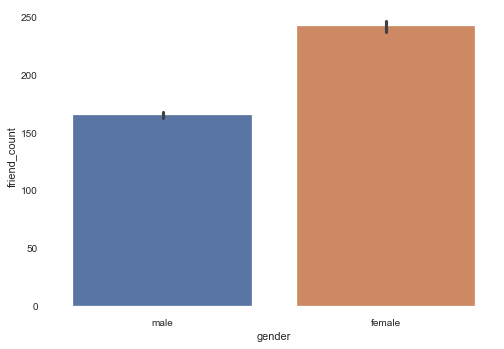

In [21]:
sns.barplot(y=facebook_df.friend_count,x=facebook_df.gender)

In [63]:
# Check the friendships_initiated by gender


fb_friendships_initiated=facebook_df.groupby(['gender'], axis=0).agg({'friendships_initiated':[np.size,np.sum,np.mean]})
fb_friendships_initiated



friendships_initiated                     
                        size      sum        mean
gender                                           
female                 40254  4584894  113.899091
male                   58574  6037023  103.066600

<AxesSubplot:xlabel='gender', ylabel='friendships_initiated'>

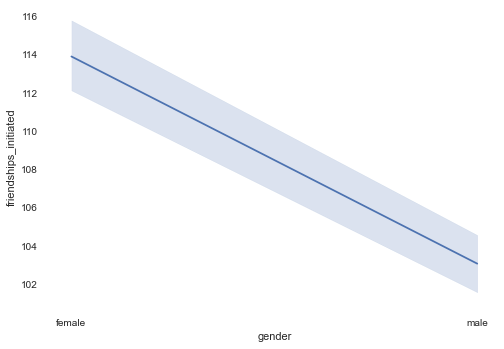

In [42]:
sns.lineplot(y=facebook_df.friendships_initiated,x=facebook_df.gender)

friendships_initiated                     
                           size      sum        mean
age_group                                           
10-20                     24752  4262993  172.228224
21-30                     28646  2863374   99.957202
31-40                     12491   781016   62.526299
41-50                      8968   530270   59.129126
51-60                      9319   558400   59.920592
61-70                      6855   474079   69.158133
71-80                      2249   133725   59.459760
81-90                       817   105669  129.337821
91-100                     1219   220746  181.087777
101-110                    3449   670205  194.318643

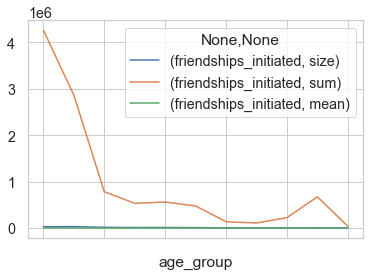

In [64]:
# Check the friendships_initiated by which age group more
fb_likes_initiated=facebook_df.groupby(['age_group'], axis=0).agg({'friendships_initiated':[np.size,np.sum,np.mean]})
fb_likes_initiated.plot()
fb_likes_initiated.head(10)


In [47]:
#  Likes received by based on gender

fb_likes_received=facebook_df.groupby(['gender'], axis=0).agg({'likes_received':[np.sum,np.mean]})
#fb_likes_received.plot()
fb_likes_received.head()


# in the dataset, male users are more but here females are receiving more likes. intersting!!

likes_received            
                  sum        mean
gender                           
female       10121282  251.435435
male          3977851   67.911548

<AxesSubplot:xlabel='gender', ylabel='likes_received'>

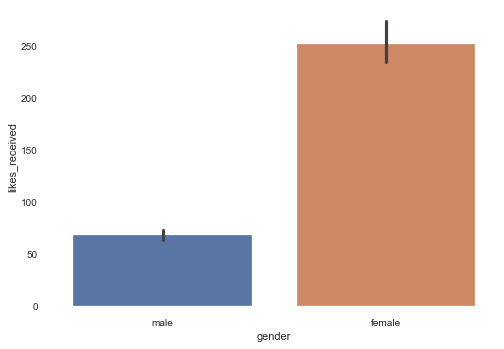

In [46]:
sns.barplot(x=facebook_df.gender,y=facebook_df.likes_received)

In [48]:
#Top 10 users getting highest likes received
facebook_df.sort_values(by='likes_received',ascending=False)[:10]

,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
94906,17,14,1996,8,female,401.0,818,395,1016,261197,659,131244,357,129953,10-20
77121,20,5,1993,8,female,253.0,230,73,2078,178166,1982,138561,96,39605,10-20
98822,23,4,1990,9,female,705.0,4077,793,1877,152014,80,89911,1797,62103,21-30
98994,20,4,1993,1,female,402.0,1988,332,7351,106025,7248,73333,103,32692,10-20
98878,23,6,1990,6,male,596.0,4320,836,2996,82623,179,43410,2817,39213,21-30
49230,20,12,1993,1,male,245.0,79,50,477,53534,78,30387,399,23147,10-20
98773,18,25,1995,1,male,51.0,4817,32,1346,52964,1342,18925,4,34039,10-20
98937,20,4,1993,12,female,1334.0,4622,1819,4280,45633,472,30754,3808,14879,10-20
98936,17,1,1996,5,female,976.0,3683,755,10478,42449,246,27353,10232,15096,10-20
98686,74,27,1939,11,male,832.0,4630,831,966,39536,941,10199,25,29337,71-80
